# Project: Predict Frog Toxicity with Python and XGBoost

## Data Processing

### Task 1: Import Libraries

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from onnxmltools.convert import convert_xgboost
from onnxmltools.convert.common.data_types import FloatTensorType
from onnxruntime import InferenceSession

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



### Task 2: Load the Dataset

In [2]:
# Load the data
data = "/usercode/data/Data_MaanCummings_2011_ AmNat52931_ByPop.txt"
df = pd.read_table(data)
df

,pop,pop#,ntox,tox,toxse,normtox,normtoxse,viewer,background,noise,vord,dl,ds,euc,qt,qtse,normqt,dluvminus,dsuvminus,eucuvminus
0,AG,4.0,7.0,1.088162,0.098258,0.632902,0.057149,bird,heli,sp,d,0.663722,0.233671,0.555260,3689.650359,160.547777,0.427837,0.663722,0.233207,0.554822
1,AG,4.0,7.0,1.088162,0.098258,0.632902,0.057149,bird,bark,sp,d,0.112857,0.476213,0.209312,3689.650359,160.547777,0.427837,0.112857,0.468019,0.206925
2,AG,4.0,7.0,1.088162,0.098258,0.632902,0.057149,bird,leaf,sp,d,0.713477,0.589576,0.687094,3689.650359,160.547777,0.427837,0.713477,0.585557,0.686149
3,AG,4.0,7.0,1.088162,0.098258,0.632902,0.057149,bird,bark,fix,d,0.112857,0.476213,0.209312,3689.650359,160.547777,0.427837,NaN,NaN,NaN
4,AG,4.0,7.0,1.088162,0.098258,0.632902,0.057149,bird,heli,fix,d,0.663722,0.233671,0.555260,3689.650359,160.547777,0.427837,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,TALA,11.0,4.0,0.425139,0.113806,0.247271,0.066192,snake,heli,sp,v,0.774689,0.629879,0.776108,9752.045135,945.940488,NaN,NaN,NaN,NaN
551,TALA,11.0,4.0,0.425139,0.113806,0.247271,0.066192,snake,leaf,sp,v,0.790821,0.627782,0.791856,9752.045135,945.940488,NaN,NaN,NaN,NaN
552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#  Display the first five rows

df.head(5)

,pop,pop#,ntox,tox,toxse,normtox,normtoxse,viewer,background,noise,vord,dl,ds,euc,qt,qtse,normqt,dluvminus,dsuvminus,eucuvminus
0,AG,4.0,7.0,1.088162,0.098258,0.632902,0.057149,bird,heli,sp,d,0.663722,0.233671,0.555260,3689.650359,160.547777,0.427837,0.663722,0.233207,0.554822
1,AG,4.0,7.0,1.088162,0.098258,0.632902,0.057149,bird,bark,sp,d,0.112857,0.476213,0.209312,3689.650359,160.547777,0.427837,0.112857,0.468019,0.206925
2,AG,4.0,7.0,1.088162,0.098258,0.632902,0.057149,bird,leaf,sp,d,0.713477,0.589576,0.687094,3689.650359,160.547777,0.427837,0.713477,0.585557,0.686149
3,AG,4.0,7.0,1.088162,0.098258,0.632902,0.057149,bird,bark,fix,d,0.112857,0.476213,0.209312,3689.650359,160.547777,0.427837,NaN,NaN,NaN
4,AG,4.0,7.0,1.088162,0.098258,0.632902,0.057149,bird,heli,fix,d,0.663722,0.233671,0.555260,3689.650359,160.547777,0.427837,NaN,NaN,NaN


In [4]:
# Print out the column names

df.columns

Index(['pop', 'pop#', 'ntox', 'tox', 'toxse', 'normtox', 'normtoxse', 'viewer',
       'background', 'noise', 'vord', 'dl', 'ds', 'euc', 'qt', 'qtse',
       'normqt', 'dluvminus', 'dsuvminus', 'eucuvminus'],
      dtype='object')

In [5]:
# Rename columns
columns = ['pop', 'pop_number', 'n_tox', 'toxicity', 'toxicity_se', 'toxicity_normalised', 'toxicity_norm_se', 'viewer', 'background', 'noise', 'v_or_d', 'vs_lumin_cont', 'vs_chrom_cont', 'vs_conspic', 'vi_brightness', 'vi_bright_se', 'vi_bright_normalised', 'bird_lumin_cont', 'bird_chrom_cont', 'bird_conspic_cont']
df.columns = columns

### Task 3: Clean the Data

In [6]:
# Create a data subset
df = df[["pop", "n_tox", "toxicity", "viewer", "background", "noise", "v_or_d", "vs_lumin_cont", "vs_chrom_cont", "vs_conspic", "vi_brightness"]]
df.head()

,pop,n_tox,toxicity,viewer,background,noise,v_or_d,vs_lumin_cont,vs_chrom_cont,vs_conspic,vi_brightness
0,AG,7.0,1.088162,bird,heli,sp,d,0.663722,0.233671,0.555260,3689.650359
1,AG,7.0,1.088162,bird,bark,sp,d,0.112857,0.476213,0.209312,3689.650359
2,AG,7.0,1.088162,bird,leaf,sp,d,0.713477,0.589576,0.687094,3689.650359
3,AG,7.0,1.088162,bird,bark,fix,d,0.112857,0.476213,0.209312,3689.650359
4,AG,7.0,1.088162,bird,heli,fix,d,0.663722,0.233671,0.555260,3689.650359


In [7]:
# Display the first five rows

df.head()

,pop,n_tox,toxicity,viewer,background,noise,v_or_d,vs_lumin_cont,vs_chrom_cont,vs_conspic,vi_brightness
0,AG,7.0,1.088162,bird,heli,sp,d,0.663722,0.233671,0.555260,3689.650359
1,AG,7.0,1.088162,bird,bark,sp,d,0.112857,0.476213,0.209312,3689.650359
2,AG,7.0,1.088162,bird,leaf,sp,d,0.713477,0.589576,0.687094,3689.650359
3,AG,7.0,1.088162,bird,bark,fix,d,0.112857,0.476213,0.209312,3689.650359
4,AG,7.0,1.088162,bird,heli,fix,d,0.663722,0.233671,0.555260,3689.650359


In [8]:
# Obtain data type information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pop            552 non-null    object 
 1   n_tox          552 non-null    float64
 2   toxicity       552 non-null    float64
 3   viewer         516 non-null    object 
 4   background     516 non-null    object 
 5   noise          540 non-null    object 
 6   v_or_d         528 non-null    object 
 7   vs_lumin_cont  516 non-null    float64
 8   vs_chrom_cont  516 non-null    float64
 9   vs_conspic     516 non-null    float64
 10  vi_brightness  528 non-null    float64
dtypes: float64(6), object(5)
memory usage: 47.8+ KB


In [9]:
# Describe basic statistics

df.describe()

,n_tox,toxicity,vs_lumin_cont,vs_chrom_cont,vs_conspic,vi_brightness
count,552.000000,552.000000,516.000000,516.000000,516.000000,528.000000
mean,4.826087,0.904571,0.640985,0.642940,0.679841,7773.949061
std,0.816464,0.450577,0.269206,0.288689,0.249739,3409.624876
min,4.000000,0.337735,0.011419,0.013386,0.051274,3689.650359
25%,4.000000,0.504583,0.472497,0.452943,0.487526,5371.793596
50%,5.000000,0.861168,0.698175,0.737805,0.734742,7322.685401
75%,5.000000,1.398060,0.836354,0.870051,0.874383,8981.527250
max,7.000000,1.719322,1.000000,1.000000,1.000000,16946.691780


In [10]:
# Check for missing values
df.isnull().sum()


pop               3
n_tox             3
toxicity          3
viewer           39
background       39
noise            15
v_or_d           27
vs_lumin_cont    39
vs_chrom_cont    39
vs_conspic       39
vi_brightness    27
dtype: int64

In [11]:
# Drop the missing values & recalculate the sums

df = df.dropna()
df.isnull().sum()

pop              0
n_tox            0
toxicity         0
viewer           0
background       0
noise            0
v_or_d           0
vs_lumin_cont    0
vs_chrom_cont    0
vs_conspic       0
vi_brightness    0
dtype: int64

In [12]:
# Check for duplicate values
df.duplicated().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 516 entries, 0 to 551
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pop            516 non-null    object 
 1   n_tox          516 non-null    float64
 2   toxicity       516 non-null    float64
 3   viewer         516 non-null    object 
 4   background     516 non-null    object 
 5   noise          516 non-null    object 
 6   v_or_d         516 non-null    object 
 7   vs_lumin_cont  516 non-null    float64
 8   vs_chrom_cont  516 non-null    float64
 9   vs_conspic     516 non-null    float64
 10  vi_brightness  516 non-null    float64
dtypes: float64(6), object(5)
memory usage: 48.4+ KB


### Task 4: Perform Simple EDA

<Axes: xlabel='toxicity', ylabel='Count'>

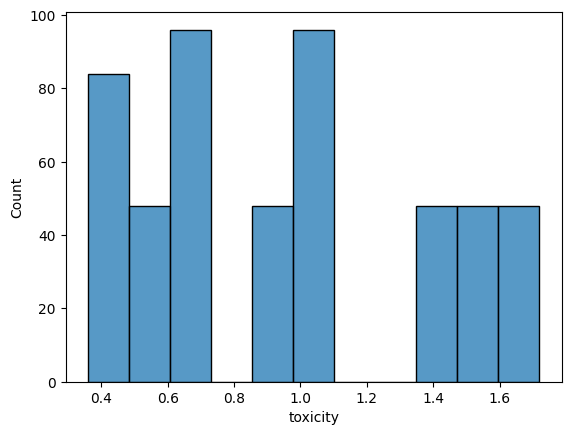

In [13]:
# Plot a histogram of the target variable
sns.histplot(df.toxicity)

In [14]:
# Obtain correlation values
correlation = df[["n_tox", "toxicity", "vs_lumin_cont", "vs_chrom_cont", "vs_conspic", "vi_brightness"]].corr()
correlation

,n_tox,toxicity,vs_lumin_cont,vs_chrom_cont,vs_conspic,vi_brightness
n_tox,1.000000,0.449939,-0.037702,-0.035318,-0.040571,-0.045342
toxicity,0.449939,1.000000,0.287901,0.003888,0.282148,0.384922
vs_lumin_cont,-0.037702,0.287901,1.000000,0.379860,0.973140,0.589058
vs_chrom_cont,-0.035318,0.003888,0.379860,1.000000,0.495945,-0.079963
vs_conspic,-0.040571,0.282148,0.973140,0.495945,1.000000,0.598212
vi_brightness,-0.045342,0.384922,0.589058,-0.079963,0.598212,1.000000


<Axes: >

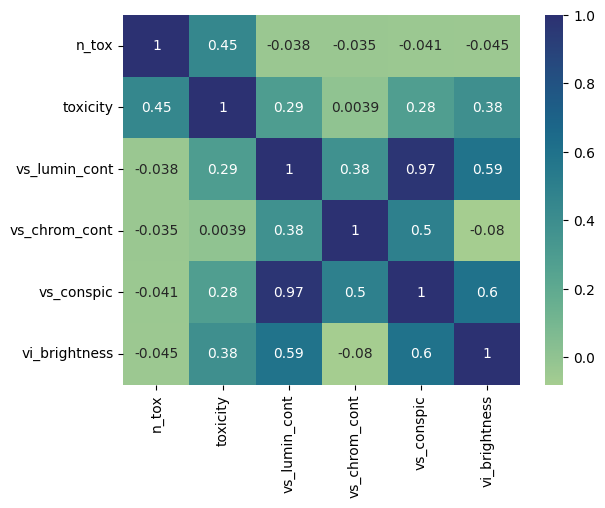

In [15]:
# Plot a correlation matrix

sns.heatmap(correlation, cmap="crest", annot=True)

### Task 5: Split the Data

In [16]:
# Split the data into train and test
df_train, df_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=2)

In [17]:
# Print out the shape of the new DataFrames
print("Train:", df_train.shape[0])
print("Test:", df_test.shape[0])

Train: 412
Test: 104


In [18]:
# Isolate and transform the target variable
y_train = np.log1p(df_train['toxicity'].values)
y_test = np.log1p(df_test['toxicity'].values)



In [19]:
# Delete the target variable from DataFrames
del df_train['toxicity']
del df_test['toxicity']

## Train your model

### Task 6: Train a Baseline Model

In [20]:
# Encode the data

x_train = pd.get_dummies(df_train, dtype="int")
x_test = pd.get_dummies(df_test, dtype="int")

In [21]:
x_train.head()

,n_tox,vs_lumin_cont,vs_chrom_cont,vs_conspic,vi_brightness,pop_AG,pop_AL,pop_BCG,pop_BCO,pop_CA,...,viewer_crab,viewer_pumilio,viewer_snake,background_bark,background_heli,background_leaf,noise_fix,noise_sp,v_or_d_d,v_or_d_v
131,5.0,0.982828,0.630611,0.983457,16033.466510,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1
429,5.0,0.218747,0.470099,0.347923,6085.983019,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,1
361,5.0,0.606519,0.524435,0.595305,5735.297600,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
12,7.0,0.046300,1.000000,0.372387,3689.650359,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
456,5.0,1.000000,1.000000,1.000000,7484.570912,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0


In [22]:
# Create the DMatrices
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)


In [23]:
# Define XGBoost parameters
xgb_params = {'eval_metric': 'rmse'}

In [24]:
# Fit the model
model = xgb.train(xgb_params, dtrain)

In [25]:
# Obtain predictions
y_pred = model.predict(dtest)


In [26]:
# Calculate RMSE

score = np.sqrt(mean_squared_error(y_test, y_pred))
score

0.008108952276505967

### Task 7: Tune the Model

In [27]:
# Update the parameter dictionary

xgb_params = {
 'colsample_bytree': 0.8,
 'eval_metric': 'rmse',
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 5,
 'objective': 'reg:squarederror',
 'random_state': 10
}

In [28]:
# Retrain the model
model = xgb.train(xgb_params, dtrain, num_boost_round=86)


In [29]:
# Obtain updated predictions

y_pred2 = model.predict(dtest)

In [30]:
# Calculate and display RMSE

score2 = np.sqrt(mean_squared_error(y_test, y_pred2))
score2

0.004364216288222127

### Task 8: Compare Model Performance

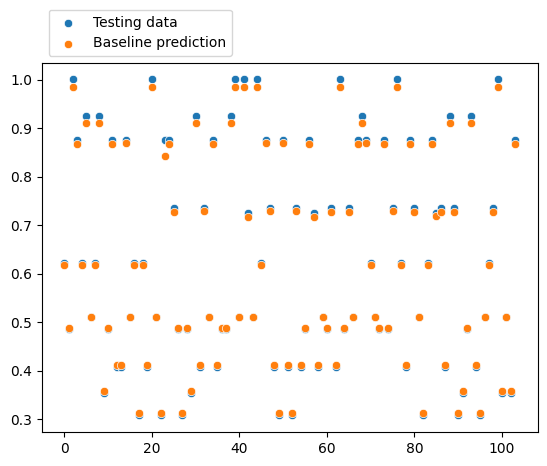

In [31]:
# Create the first plot
sns.scatterplot(x=range(len(y_test)), y=y_test)
sns.scatterplot(x=range(len(y_pred)), y=y_pred)

plt.legend(["Testing data", "Baseline prediction"], loc="lower left", bbox_to_anchor=(0, 1))
plt.show()


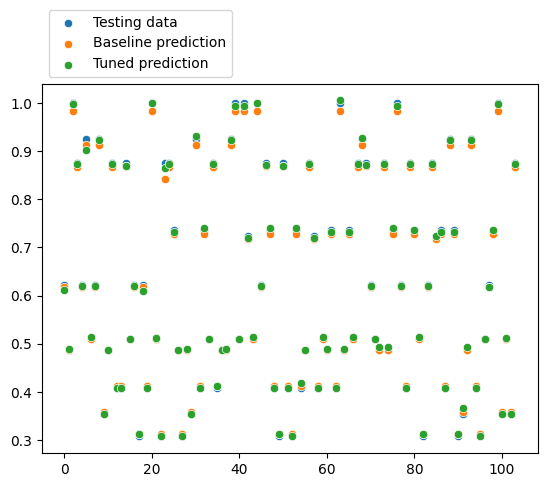

In [32]:
# Create the second plot

sns.scatterplot(x= range(len(y_test)), y=y_test)
sns.scatterplot(x= range(len(y_pred)), y=y_pred)
sns.scatterplot(x= range(len(y_pred2)), y=y_pred2)

plt.legend(["Testing data", "Baseline prediction", "Tuned prediction"], loc="lower left", bbox_to_anchor=(0, 1))
plt.show()

## Model Export

### Task 9: Prepare Model for Export

In [33]:
# Define input shape

tensor = FloatTensorType([None, x_train.shape[1]])

In [34]:
# Create input list

initial_type = [('float_input', tensor)]

In [35]:
# Rename model features

model.feature_names = [f"f{num}" for num in range(len(model.feature_names))]

### Task 10: Export the Model

In [36]:
# Convert the model

onnx_model = convert_xgboost(model, initial_types=initial_type)

In [37]:
# Write the final file

with open("/usercode/model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [38]:
# Start inference session

session = InferenceSession("/usercode/model.onnx")

In [39]:
# Obtain input and output names

input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

In [40]:
# Display input and output names

input_name, output_name

('float_input', 'variable')